# Gradient Descent in Regression

$ \hat{y} = mx + b $

In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Preparing our dataset

In [2]:
data = np.random.randn(500, 2)

In [3]:
data[0]

array([-0.3057197 ,  0.61578406])

First column indicates the x value

In [4]:
data[0,0]

np.float64(-0.3057196995110335)

Second column indicates the y value

In [5]:
data[0,1]

np.float64(0.6157840579110435)

Simple linear regression is expressed as
$ f\prime(x) = 2x$ <br>
We have two parameters, m and b. We store both of these params in an array called theta. First, we initialize theta with zeros, as follow:

In [6]:
theta = np.zeros(2)

In [7]:
print(theta)

[0. 0.]


# Loss Function

In [8]:
def loss_function(data,theta):

    #get m and b
    m = theta[0]
    b = theta[1]

    loss = 0

    #for each iteration
    for i in range(0, len(data)):

        #get x and y
        x = data[i, 0]
        y = data[i, 1]

        #predict the value of y
        y_hat = (m*x + b)

        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)

    #mean sqaured error
    mse = loss / float(len(data))

    return mse

In [9]:
loss_function(data, theta)

np.float64(0.9802911455076465)

#Gradients of Loss Function

In [10]:
def compute_gradients(data, theta):

    gradients = np.zeros(2)

    #total number of data points
    N = float(len(data))

    m = theta[0]
    b = theta[1]

    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]

        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))

        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))

    #add epsilon to avoid division by zero error
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon)

    return gradients

In [11]:
compute_gradients(data,theta)

array([-4.26754319e-05, -2.96169064e-04])

Update Rule

In [12]:
num_iterations = 50000

Define the learning rate:

In [13]:
lr = 1e-2

In [14]:
loss = []

In [15]:
theta = np.zeros(2)

for t in range(num_iterations):

    #compute gradients
    gradients = compute_gradients(data, theta)

    #update parameter
    theta = theta - (lr*gradients)

    #store the loss
    loss.append(loss_function(data,theta))

Text(0.5, 1.0, 'Gradient Descent')

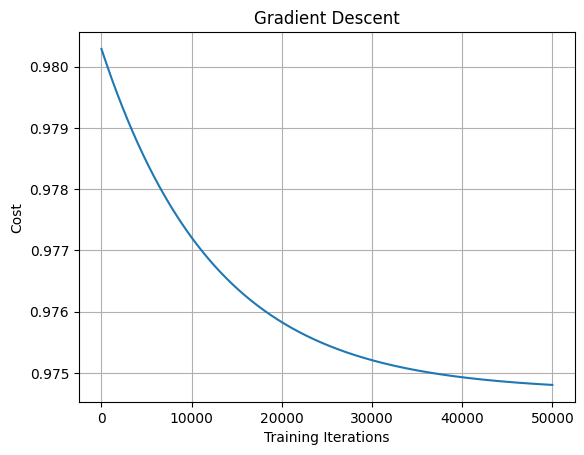

In [16]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

#MiniBatch Gradient Descent

In [17]:
def minibatch(data, theta, lr = 1e-2, minibatch_ratio = 0.01, num_iterations = 5000):

    loss = []
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))

    for t in range(num_iterations):
        sample_size = random.sample(range(len(data)), minibatch_size)
        np.random.shuffle(data)

        #sample batch of data
        sample_data = data[0:sample_size[0], :]

        #compute gradients
        grad = compute_gradients(sample_data, theta)

        #update parameters
        theta = theta - (lr * grad)

        loss.append(loss_function(data,theta))

    return loss

In [18]:
theta = np.zeros(2)
loss = minibatch(data, theta)

Text(0.5, 1.0, 'Mini-Batch Gradient Descent')

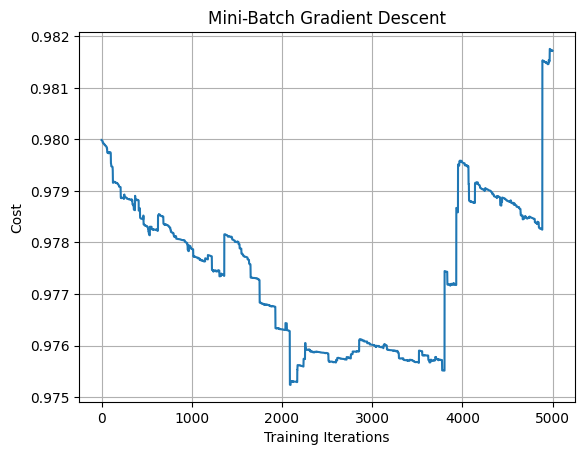

In [19]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.title('Mini-Batch Gradient Descent')

#Gradient descent with Momentum

In [20]:
def Momentum(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):

    loss = []

    #Initialize vt with zeros:
    vt = np.zeros(theta.shape[0])


    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #Update vt by equation (8)
        vt = gamma * vt + lr * gradients

        #update model parameter theta by equation (9)
        theta = theta - vt

        #store loss of every iteration
        loss.append(loss_function(data,theta))

    return loss

In [21]:
theta = np.zeros(2)
loss = Momentum(data, theta)

Text(0.5, 1.0, 'Mometum')

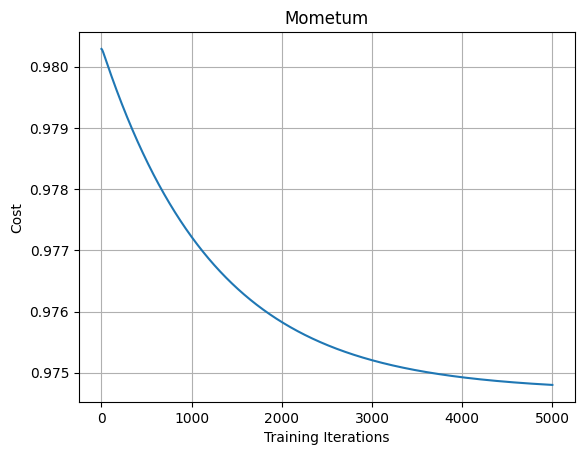

In [22]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

plt.title('Mometum')

#Nesterov Accelerated Gradients

In [23]:
def NAG(data, theta, lr = 1e-2, gamma = 0.9, num_iterations = 5000):

    loss = []

    #Initialize vt with zeros:
    vt = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respet to (theta-gamma*vt-1)
        gradients = compute_gradients(data, theta - gamma * vt)

        #update vt by equation (10)
        vt = gamma * vt + lr * gradients

        #update model parameter theta by equation (11)
        theta = theta - vt

        loss.append(loss_function(data,theta))

    return loss

Compute and update gradients using NAG:

In [24]:
theta = np.zeros(2)
loss = NAG(data, theta)

Text(0, 0.5, 'Cost')

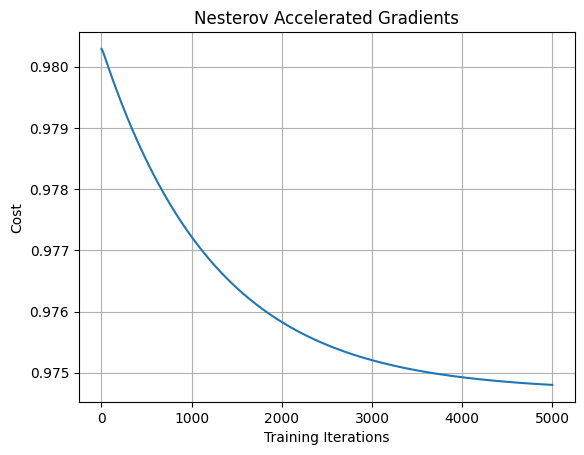

In [25]:
plt.plot(loss)
plt.grid()

plt.title('Nesterov Accelerated Gradients')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

#Set Learning rate adaptively using AdaGrad

In [26]:
def AdaGrad(data, theta, lr = 1e-2, epsilon = 1e-8, num_iterations = 100):

    loss = []

    #initialize gradients_sum for storing sum of gradients
    gradients_sum = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute square of sum of gradients
        gradients_sum += gradients ** 2

        #update gradients
        gradient_update = gradients / (np.sqrt(gradients_sum + epsilon))

        #update model parameter according to equation (12)
        theta = theta - (lr * gradient_update)

        loss.append(loss_function(data,theta))

    return loss

In [27]:
theta = np.zeros(2)
loss = AdaGrad(data, theta)

Text(0, 0.5, 'Cost')

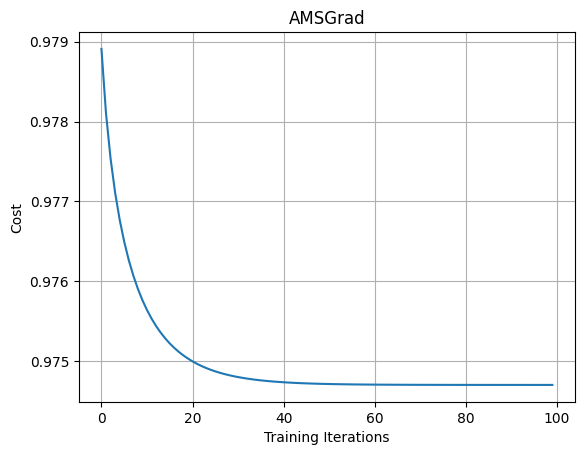

In [28]:
plt.plot(loss)
plt.grid()
plt.title('AMSGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

Do away with Learning rate using Adadelta

In [29]:
def AdaDelta(data, theta, gamma = 0.9, epsilon = 1e-5, num_iterations = 500):

    loss = []

    #initialize running average of gradients
    E_grad2 = np.zeros(theta.shape[0])

    #initialize running average of parameter update
    E_delta_theta2 = np.zeros(theta.shape[0])


    for t in range(num_iterations):

        #compute gradients of loss with respect to theta
        gradients = compute_gradients(data, theta)

        #compute running average of gradients as given in equation (13)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))

        #compute delta_theta as given in equation (14)
        delta_theta = - (np.sqrt(E_delta_theta2 + epsilon)) / (np.sqrt(E_grad2 + epsilon)) * gradients

        #compute running average of parameter updates as given in equation (15)
        E_delta_theta2 = (gamma * E_delta_theta2) + ((1. - gamma) * (delta_theta ** 2))

        #update the model parameter, theta as given in equation (16)
        theta = theta + delta_theta

        #store  the loss
        loss.append(loss_function(data,theta))

    return loss

In [30]:
theta = np.zeros(2)
loss = AdaDelta(data, theta)

Text(0, 0.5, 'Cost')

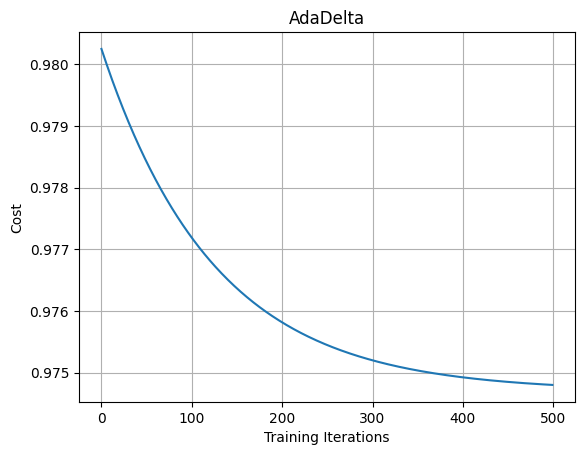

In [31]:
plt.plot(loss)
plt.grid()
plt.title('AdaDelta')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

# Overcoming limitations of AdaGrad using RMSProp

In [32]:
def RMSProp(data, theta, lr = 1e-2, gamma = 0.9, epsilon = 1e-6, num_iterations = 100):

    loss= []

    #initialize running average of gradients
    E_grad2 = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute running average of gradients as given in equation (17)
        E_grad2 = (gamma * E_grad2) + ((1. - gamma) * (gradients ** 2))

        #update model parameter as given in equation (18)
        theta = theta - (lr / (np.sqrt(E_grad2 + epsilon)) * gradients)

        #store the loss
        loss.append(loss_function(data,theta))

    return loss

In [33]:
theta = np.zeros(2)
loss = RMSProp(data, theta)

Text(0, 0.5, 'Cost')

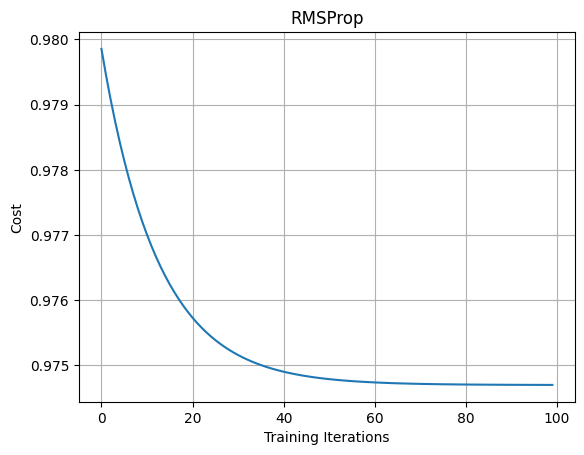

In [34]:
plt.plot(loss)
plt.grid()
plt.title('RMSProp')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

#Adam - Adaptive Moment Estimation

In [35]:
def Adam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 1000):

    loss = []

    #initialize first moment mt
    mt = np.zeros(theta.shape[0])

    #initialize second moment vt
    vt = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #update first moment mt as given in equation (19)
        mt = beta1 * mt + (1. - beta1) * gradients

        #update second moment vt as given in equation (20)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2

        #compute bias-corected estimate of mt (21)
        mt_hat = mt / (1. - beta1 ** (t+1))

        #compute bias-corrected estimate of vt (22)
        vt_hat = vt / (1. - beta2 ** (t+1))

        #update the model parameter as given in (23)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat

        loss.append(loss_function(data,theta))

    return loss

In [36]:
theta = np.zeros(2)
loss = RMSProp(data, theta)

Text(0, 0.5, 'Cost')

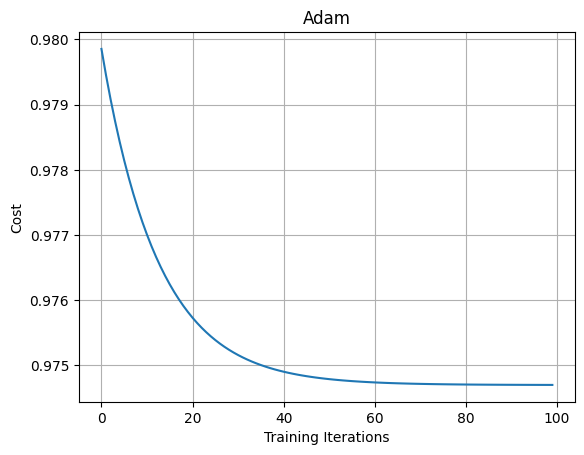

In [37]:
plt.plot(loss)
plt.grid()
plt.title('Adam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

#Adamax - Adam based on infinity norm

In [38]:
def Adamax(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 500):

    loss = []

    #initialize first moment mt
    mt = np.zeros(theta.shape[0])

    #initialize second moment vt
    vt = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute first moment mt as given in equation (24)
        mt = beta1 * mt + (1. - beta1) * gradients

        #compute second moment vt as given in equation (25)
        vt = np.maximum(beta2 * vt, np.abs(gradients))

        #compute bias-corrected estimate of mt as given in equation (26)
        mt_hat = mt / (1. - beta1 ** (t+1))

        #update theta as give in equation (27)
        theta = theta - ((lr / (vt + epsilon)) * mt_hat)

        #store the loss
        loss.append(loss_function(data,theta))

    return loss

In [39]:
theta = np.zeros(2)
loss = Adamax(data, theta)

Text(0, 0.5, 'Cost')

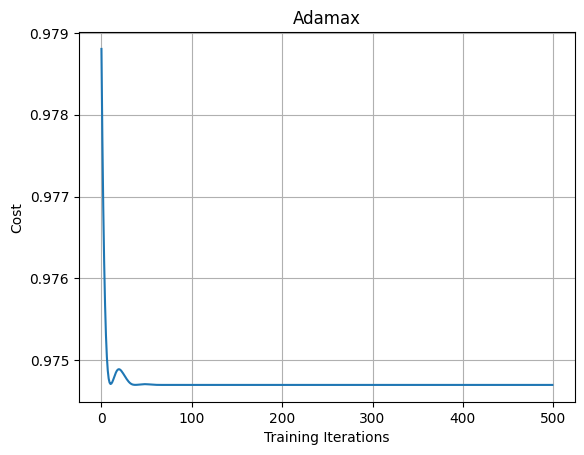

In [40]:
plt.plot(loss)
plt.grid()
plt.title('Adamax')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

#Adaptive Moment Estimation with AMSGrad

In [41]:
def AMSGrad(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.9, epsilon = 1e-6, num_iterations = 50):

    loss = []

    #initialize first moment mt
    mt = np.zeros(theta.shape[0])

    #initialize second moment vt
    vt = np.zeros(theta.shape[0])

    #initialize vt_hat
    vt_hat = np.zeros(theta.shape[0])

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute first moment as given in equation (28)
        mt = beta1 * mt + (1. - beta1) * gradients

        #compute second moment as given in equation (29)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2

        #compute vt_hat as given in equation (30)
        vt_hat = np.maximum(vt_hat,vt)

        #compute bias-corrected estimate of mt as shown in equation (31)
        mt_hat = mt / (1. - beta1 ** (t+1))

        #update model parameter theta as given in (32)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat

        #store loss
        loss.append(loss_function(data,theta))

    return loss

In [42]:
theta = np.zeros(2)
loss = AMSGrad(data, theta)

Text(0, 0.5, 'Cost')

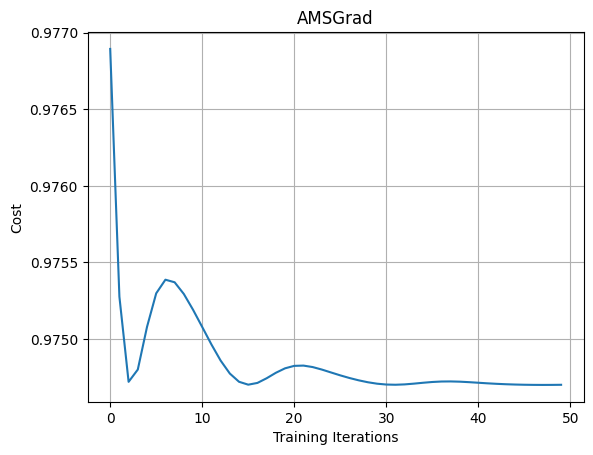

In [43]:
plt.plot(loss)
plt.grid()
plt.title('AMSGrad')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

#Nadam - Adding NAG to ADAM

In [44]:
def Nadam(data, theta, lr = 1e-2, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-6, num_iterations = 50):

    loss = []

    #initialize first moment mt
    mt = np.zeros(theta.shape[0])

    #initialize second moment vt
    vt = np.zeros(theta.shape[0])
    beta_prod = 1

    for t in range(num_iterations):

        #compute gradients with respect to theta
        gradients = compute_gradients(data, theta)

        #compute first moment as given in equation (33)
        mt = beta1 * mt + (1. - beta1) * gradients

        #compute second moment as given in equation (34)
        vt = beta2 * vt + (1. - beta2) * gradients ** 2
        beta_prod = beta_prod * (beta1)

        #compute bias-corrected estimates of mt as shown in (35)
        mt_hat = mt / (1. - beta_prod)

        #compute bias-corrected estimate of gt as shown in (36)
        g_hat = gradients / (1. - beta_prod)

        #compute bias-corrected estimate of vt as shown in (37)
        vt_hat = vt / (1. - beta2 ** (t))

        #compute mt tilde as shown in (38)
        mt_tilde = (1-beta1**t+1) * mt_hat + ((beta1**t)* g_hat)

        #update theta as given in (39)
        theta = theta - (lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat

        #store the loss
        loss.append(loss_function(data,theta))

    return loss

In [45]:
theta = np.zeros(2)
loss = Nadam(data, theta)

Text(0, 0.5, 'Cost')

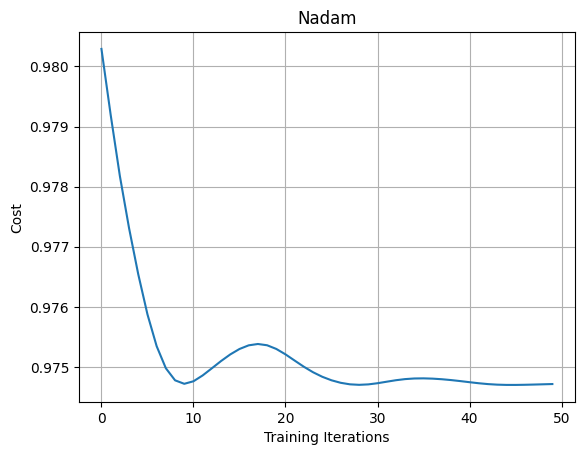

In [46]:
plt.plot(loss)
plt.grid()
plt.title('Nadam')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')